---
title: "STAT 214 Lab X"
execute: 
  echo: false
---

In [253]:
import pandas as pd
df_raw = pd.read_csv("../data/TBI PUD 10-08-2013.csv")

In [254]:
df_raw.shape

(43399, 125)

**Data Cleaning**
1. Get check missing value percentage by column. 

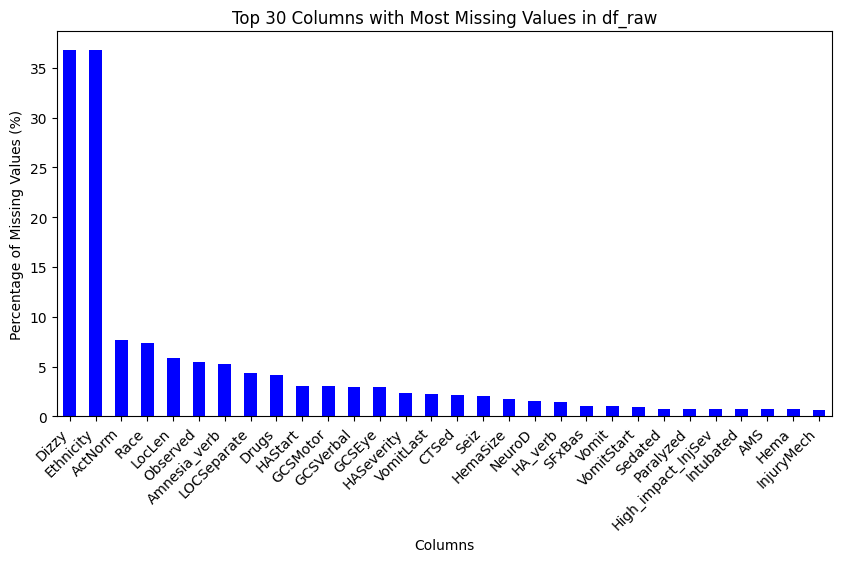

In [255]:
import matplotlib.pyplot as plt

missing_values = df_raw.isnull().sum() / len(df_raw) * 100

missing_values = missing_values.sort_values(ascending=False).head(30)

# Plot the missing values
plt.figure(figsize=(10, 5))
missing_values.plot(kind='bar', color='blue')
plt.xlabel("Columns")
plt.ylabel("Percentage of Missing Values (%)")
plt.title("Top 30 Columns with Most Missing Values in df_raw")
plt.xticks(rotation=45, ha="right")
plt.show()


We can see by the graph that columns 'dizzy' and 'ethinicity' has the highest percentage (over 35%) of missing values. Regarding our goal is to find out which factors influence the possibility of ciTBI, it is reasonable to erase these two columns. 

In [4]:
df = df_raw.drop(columns = ['Dizzy','Ethnicity'])

2. Erase unnecessary columns which are too specific or not related to our goal, which is the prediction of ciTBI.
Based on the reading and documentation of the explanation of the columns, it is reasonable to cut off some trivial columns like, patient number, physician information, redundant or too specific variables, detailed physical exam findings, CT scan ordering reasons (since we only need to check if CT was done).

In [5]:
df = df.drop(columns = ['PatNum','EmplType', 'Certification', 'InjuryMech', 'Intubated', 'Paralyzed', 'Sedated', 'OSIExtremity', 'OSICut', 'OSICspine', 'OSIFlank', 'OSIAbdomen',
       'OSIPelvis', 'OSIOth', 'CTForm1', 'IndAge', 'IndAmnesia', 'IndAMS', 'IndClinSFx', 'IndHA', 'IndHema',
       'IndLOC', 'IndMech', 'IndNeuroD', 'IndRqstMD', 'IndRqstParent',
       'IndRqstTrauma', 'IndSeiz', 'IndVomit', 'IndXraySFx', 'IndOth', 'CTSed', 'CTSedAgitate', 'CTSedAge', 'CTSedRqst', 'CTSedOth',
       'Observed', 'EDDisposition', 'EDCT','HospHead', 'PosCT', 'DeathTBI', 'HospHeadPosCT', 'Intub24Head',
       'Neurosurgery', 'Drugs'])

In [6]:
df = df.drop(columns= ['Finding1', 'Finding2', 'Finding3', 'Finding4', 'Finding5', 'Finding6',
       'Finding7', 'Finding8', 'Finding9', 'Finding10', 'Finding11',
       'Finding12', 'Finding13', 'Finding14', 'Finding20', 'Finding21',
       'Finding22', 'Finding23'])

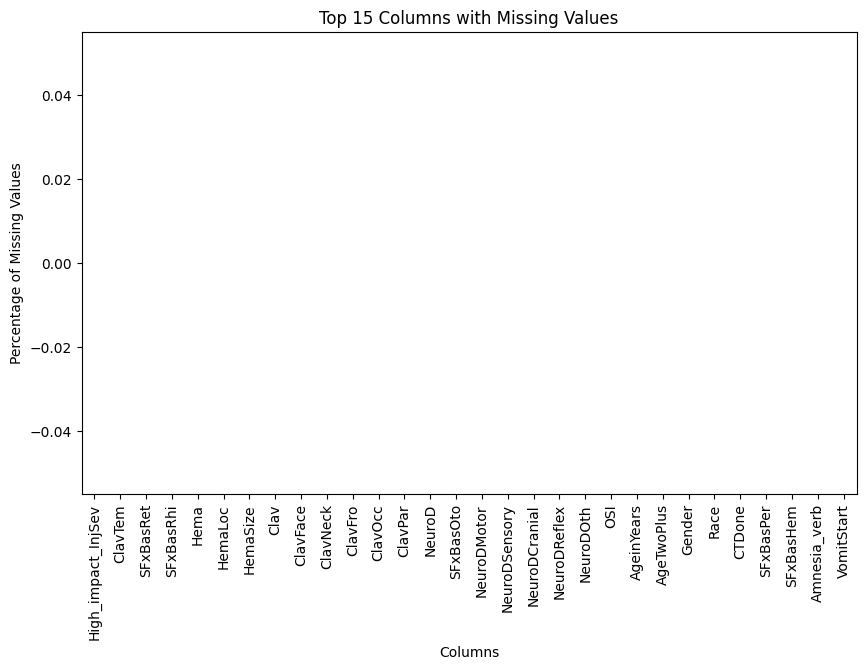

In [252]:
# Get percentage of missing values
missing_percentage = (df.isnull().sum() / len(df)) * 100

# Select the top 15 columns with the most missing values
top_missing = missing_percentage.sort_values(ascending=False).head(30)

# Plot
plt.figure(figsize=(10, 6))
top_missing.plot(kind='bar', color='red')
plt.ylabel("Percentage of Missing Values")
plt.xlabel("Columns")
plt.title("Top 15 Columns with Missing Values")
plt.show()


3. Handling missing data - either impute or drop rows
First, we drop rows that have NaN values for the most important result, which is ciTBI.


In [8]:
df = df.dropna(subset=['PosIntFinal'])

Based on this chart, for the columns with more than 2% of missing values, I will impute, and for the columns with less than 2% of missing values I will erase the corresponding rows.

Handling Nans in LocSeparate and LocLen
1. LocSeparate Nan values are replaced with unknown
2. In terms of Nans in LocLen, if locseparate is 1, then fill it with the mode of loclen when locseparate is 1. If locseparate is 2, then loclen should be 92(unapplicable)

In [9]:
df['LOCSeparate'] = df['LOCSeparate'].fillna(92)
df['LOCSeparate'] = df['LOCSeparate'].replace(2, 92)


In [251]:
nan_loclen = df[df['LocLen'].isna()]

In [11]:
mode_loclen = df.loc[df['LOCSeparate'] == 1, 'LocLen'].mode()[0]
df.loc[(df['LOCSeparate'] == 1) & (df['LocLen'].isna()), 'LocLen'] = mode_loclen

# Optional: Handle LOCSeparate == 2 cases (Suspected LOC)
df.loc[(df['LOCSeparate'] == 2) & (df['LocLen'].isna()), 'LocLen'] = 92

Dealing with NAn values in HeadStart and Headseverity
- HA_verb: This column indicates whether the patient reported a headache. Missing values were imputed as "unknown" to retain information. Pre-verbal or non-verbal cases (91) were kept as a separate category.
- HAStart: Represents when the headache started. "Not applicable" (92) was retained, and missing values were imputed using the mode of the column.
- HASeverity: Indicates the severity of the headache. Missing values were imputed using the mode, while "Not applicable" (92) was kept as it provides meaningful information.

In [12]:
df['HA_verb'] = df['HA_verb'].fillna(91)  # Treat NaN as unknown

mode_hastart = df.loc[df['HA_verb'] == 1, 'HAStart'].mode()[0]
df.loc[(df['HA_verb'] == 1) & (df['HAStart'].isna()), 'HAStart'] = mode_hastart


mode_haseverity = df.loc[df['HA_verb'] == 1, 'HASeverity'].mode()[0]
df.loc[(df['HA_verb'] == 1) & (df['HASeverity'].isna()), 'HASeverity'] = mode_haseverity


Check for GCS
Since GCSTotal has zero Nan values, for the sake of the simplicity of analyzing, we will substitue GCS Motor, Verbal, and Eye with GCS total.

In [13]:
df['GCS_Sum'] = df['GCSMotor'] + df['GCSVerbal'] + df['GCSEye']

# Compare with GCSTotal
matching_rows = (df['GCSTotal'] == df['GCS_Sum']).sum()
total_rows = len(df)
matching_percentage = (matching_rows / total_rows) * 100

In [14]:
df.drop(columns=['GCSMotor', 'GCSVerbal', 'GCSEye', 'GCS_Sum'], inplace=True)

Vomit

In [15]:
df['Vomit'] = df['Vomit'].fillna(0) #percentage of Nan is low and most of values are 0 (No), so we use 0 instead of "Unknown".

mode_vomit_nbr = df.loc[df['Vomit'] == 1, 'VomitNbr'].mode()[0]
df.loc[(df['Vomit'] == 1) & (df['VomitNbr'].isna()), 'VomitNbr'] = mode_vomit_nbr

mode_vomit_start = df.loc[df['Vomit'] == 1, 'VomitStart'].mode()[0]
df.loc[(df['Vomit'] == 1) & (df['VomitStart'].isna()), 'VomitStart'] = mode_vomit_start

mode_vomit_last = df.loc[df['Vomit'] == 1, 'VomitLast'].mode()[0]
df.loc[(df['Vomit'] == 1) & (df['VomitLast'].isna()), 'VomitLast'] = mode_vomit_last

df.loc[df['Vomit'] == 0, ['VomitNbr', 'VomitStart', 'VomitLast']] = 92

Seiz

In [16]:
df['Seiz'] = df['Seiz'].fillna(0) #same method as Vomit, since Nan is very low and most values in Seiz are 0(No vomit)
mode_seiz_occur = df.loc[df['Seiz'] == 1, 'SeizOccur'].mode()[0]
df.loc[(df['Seiz'] == 1) & (df['SeizOccur'].isna()), 'SeizOccur'] = mode_seiz_occur

mode_seiz_len = df.loc[df['Seiz'] == 1, 'SeizLen'].mode()[0]
df.loc[(df['Seiz'] == 1) & (df['SeizLen'].isna()), 'SeizLen'] = mode_seiz_len
df.loc[df['Seiz'] == 0, ['SeizOccur', 'SeizLen']] = 92

Hema

In [17]:
df['Hema'] = df['Hema'].fillna(0)
# Assign 92 for patients who had no hematoma
df.loc[df['Hema'] == 0, ['HemaLoc', 'HemaSize']] = 92

# Impute missing values for those who had hematoma (Hema == 1)
mode_hemaloc = df.loc[df['Hema'] == 1, 'HemaLoc'].mode()[0]
df.loc[(df['Hema'] == 1) & (df['HemaLoc'].isna()), 'HemaLoc'] = mode_hemaloc

mode_hemasize = df.loc[df['Hema'] == 1, 'HemaSize'].mode()[0]
df.loc[(df['Hema'] == 1) & (df['HemaSize'].isna()), 'HemaSize'] = mode_hemasize


NeuroD

In [18]:
df['NeuroD'] = df['NeuroD'].fillna(0)
df.loc[df['NeuroD'] == 0, ['NeuroDMotor', 'NeuroDSensory', 'NeuroDCranial', 'NeuroDReflex', 'NeuroDOth']] = 92

for col in ['NeuroDMotor', 'NeuroDSensory', 'NeuroDCranial', 'NeuroDReflex', 'NeuroDOth']:
    mode_value = df.loc[df['NeuroD'] == 1, col].mode()[0]
    df.loc[(df['NeuroD'] == 1) & (df[col].isna()), col] = mode_value


Fill Nan values as Unknown for single columns with missing value percentage higher than 3%.

In [19]:
df['ActNorm'] = df['ActNorm'].fillna(92)
df['Race'] = df['Race'].fillna(92)
df['Amnesia_verb'] = df['Amnesia_verb'].fillna(92)

Remaining columns with NA values with less than 1 percentage
We impute with the mode of each columns.

In [21]:
missing_cols = df.columns[df.isna().any()].tolist()
for col in missing_cols:
    mode_value = df[col].mode()[0]  # Get the most frequent value
    df[col] = df[col].fillna(mode_value)

In [22]:
df.isna().any().any()
#No na values left. 

np.False_

Data Exploration

First, we try to look at the distribution of the last column, which is the result column. 
This helps understand the proportion of patients with clinically important traumatic brain injury.


In [23]:
df['PosIntFinal'].value_counts().to_frame(name='Count').assign(Percentage=lambda x: (x['Count'] / x['Count'].sum()) * 100)
#we can see by the plot below that less than 2% of children actually has ciTBI. 

,Count,Percentage
PosIntFinal,,
0.0,42616,98.241084
1.0,763,1.758916


Regarding the fact that less than 2% of the children in the data do not actually have ciTBI, we will not check how much percentage children get CT scans, and see how much children actually didn't need the CT scan since they turned out did not have ciTBI.

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

ct_citbi_counts = df.groupby(['CTDone', 'PosIntFinal']).size().unstack()
ct_citbi_counts.plot(kind='bar', stacked=True, colormap='coolwarm', ax=axes[0])

axes[0].set_title("CT Scans vs Clinically-Important TBI")
axes[0].set_xlabel("CT Done (0 = No, 1 = Yes)")
axes[0].set_ylabel("Number of Patients")
axes[0].legend(title="ciTBI (0 = No, 1 = Yes)")

ct_citbi_counts = df.groupby(['PosIntFinal', 'CTDone']).size().unstack()
ct_citbi_percentage = ct_citbi_counts.div(ct_citbi_counts.sum(axis=1), axis=0) * 100

ct_citbi_percentage.plot(kind='bar', stacked=True, colormap='coolwarm', ax=axes[1])

axes[1].set_title("Percentage of CT Scans Among ciTBI and Non-ciTBI Patients")
axes[1].set_xlabel("ciTBI (0 = No, 1 = Yes)")
axes[1].set_ylabel("Percentage of Patients (%)")
axes[1].legend(title="CT Done (0 = No, 1 = Yes)")

plt.tight_layout()

plt.show()


<Figure size 4200x1500 with 2 Axes>

- On the left chart we can see that most children did not receive a CT scan (left bar, "0" in CTDone).
Among those who did receive a CT scan (right bar, "1" in CTDone), only a small fraction were diagnosed with clinically-important TBI (ciTBI).
This suggests that many children underwent CT scans despite not having ciTBI, raising potential concerns about unnecessary radiation exposure.
- In the right chart, among children who did not have ciTBI (0 in PosIntFinal), a significant proportion still received CT scans (red section), meaning many CT scans were performed on children without severe injury.
Among children who did have ciTBI (1 in PosIntFinal), nearly all of them received a CT scan, indicating high sensitivity in using CT scans for those who truly needed it.
The small blue section in the ciTBI group (1 in PosIntFinal) represents children who had ciTBI but did not receive a CT scan, suggesting a missed diagnosis risk.
* These findings suggest a need for improved decision rules to minimize unnecessary CT scans while ensuring that high-risk patients are properly diagnosed.

**Log Regression**


In [25]:
import statsmodels.api as sm
import numpy as np
import pandas as pd

# Define predictor and outcome variable
X = df[['AMS']]  # Predictor (Altered Mental Status)
y = df['PosIntFinal']  # Outcome (Clinically Important TBI)

# Add intercept term
X = sm.add_constant(X)  # Adds a column of 1s for the intercept

# Fit the logistic regression model
logit_model = sm.Logit(y, X)
result = logit_model.fit()

# Print the model summary
print(result.summary())

# Calculate and print the odds ratio
odds_ratios = np.exp(result.params)
print("\nOdds Ratios:\n", odds_ratios)


Optimization terminated successfully.
         Current function value: 0.069344
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:            PosIntFinal   No. Observations:                43379
Model:                          Logit   Df Residuals:                    43377
Method:                           MLE   Df Model:                            1
Date:                Thu, 20 Feb 2025   Pseudo R-squ.:                  0.2165
Time:                        20:29:38   Log-Likelihood:                -3008.1
converged:                       True   LL-Null:                       -3839.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.4886      0.081    -67.529      0.000      -5.648      -5.329
AMS            3.2307      0.

**Finding1: Check the distribution of ciTBI children for each category**
I filtered the dataset to include only children who had clinically important TBI (ciTBI) and then calculating the percentage distribution of each category within the selected columns. This is a good way to understand how different categorical variables are distributed among the ciTBI cases.
For now we will exclude specific columms and look for the distribution in main categories such as AMS, SFxPalp, Clav, NeuroD, etc.

In [26]:
#Modifying data structure to see distribution clearly
df['SFxPalp'] = df['SFxPalp'].replace(2, 92) #SFxpalp 2(Unclear) is changed to 92(unapplicable)
df['High_impact_InjSev'] = df['High_impact_InjSev'].replace(1,0) #mild impact is 0
df['High_impact_InjSev'] = df['High_impact_InjSev'].replace(2,1) #moderate, high is 1
df['High_impact_InjSev'] = df['High_impact_InjSev'].replace(3,1)

In [27]:
df_citbi = df[df['PosIntFinal'] == 1]

selected_columns = ['High_impact_InjSev', 'Amnesia_verb', 'LOCSeparate', 'Seiz', 'ActNorm', 'HA_verb','Vomit', 'AMS', 'SFxPalp', 'FontBulg',
       'SFxBas', 'Hema','Clav', 'NeuroD', 'OSI']

stacked_data = {}
for col in selected_columns:
    stacked_data[col] = df_citbi[col].value_counts(normalize=True).sort_values(ascending=True) * 100

category_labels = {
    0: "No",
    1: "Yes",
    91: "Pre-verbal",
    92: "Not Applicable"
}

stacked_df = pd.DataFrame(stacked_data).fillna(0)
stacked_df = stacked_df.rename(index=category_labels)

fig, ax = plt.subplots(figsize=(12, 6))
stacked_df.T.plot(kind='bar', stacked=True, ax=ax, colormap='coolwarm')

plt.title("Stacked Bar Chart of Selected Variables(ciTBI children only)", fontsize=14)
plt.xlabel("Variables", fontsize=12)
plt.ylabel("Percentage", fontsize=12)
plt.legend(title="Categories", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


<Figure size 3600x1800 with 1 Axes>

**Insights from the Stacked Bar Chart (ciTBI Children Only)**
High Impact Injuries, Loss of Consciousness (LOC), AMS (Altered Mental Status), Scalp Hematoma (Hema), Clav (Clavicle injury), and OSI (Other Significant Injury) show a high proportion of "Yes" responses among children with ciTBI. This suggests these features strongly align with ciTBI cases, making them useful indicators. In terms of column ActNorm, it indicates a high proportion of "No", which means that a high proportion of children with ciTBI are acting abnormally.
Weak Predictors (Low Percentage of "Yes" Responses) are the following: Seizure and Anterior Fontanelle Bulging (FontBulg) have very low proportions of "Yes", indicating they might not be strong standalone predictors for ciTBI in this dataset.
In terms of mixed associations, Amnesia, Headache (HA), Vomit, Basilar Skull Fracture (SFxBas), and Neurological Deficit (NeuroD) show a mix of "Yes" and "No" responses, meaning their relationship with ciTBI might be less direct or context-dependent.
As for the comparision with results in the paper, the paper highlights AMS, LOC, Mechanism of Injury, Acting Normal and Scalp Hematoma as important predictors of ciTBI. This matches the strong predictors observed in the dataset.Interestingly, Headache, Vomiting, and Basilar Skull Fracture are considered important predictors in the paper, yet they show a more mixed distribution in this dataset. This suggests a need for further statistical testing (e.g., logistic regression or chi-square tests) to determine whether these mixed indicators are still significantly associated with ciTBI.

**Findings2**
Based on the chart above, we will now calculate the percentage of "Yes" values in each column for children without ciTBI, and then compare the percentage of "Yes" between children with and without ciTBI. The significant columns include, the useful indicators and mixed associated indicators in Finding 1, which are the following: High Impact Injuries, Loss of Consciousness (LOC), AMS (Altered Mental Status), Scalp Hematoma (Hema), Clav (Clavicle injury), and OSI (Other Significant Injury), Amnesia, Acting Normal, Headache (HA), Vomit, Basilar Skull Fracture (SFxBas), and Neurological Deficit (NeuroD). We will exclude Seiz and FontBulg.

If a feature has a much higher "Yes" percentage in ciTBI cases than in non-ciTBI cases, it may be a strong predictor of traumatic brain injury.
Conversely, if a feature has similar "Yes" percentages in both groups, it might not be as useful for prediction.

In [28]:
df_nocitbi = df[df['PosIntFinal'] == 0]

# Define selected columns
selected_columns = ['High_impact_InjSev', 'Amnesia_verb', 'LOCSeparate', 'ActNorm', 'HA_verb',
                    'Vomit', 'AMS', 'SFxPalp', 'SFxBas', 'Hema', 'Clav', 'NeuroD', 'OSI']

# Compute percentage of "Yes" values for ciTBI and non-ciTBI groups
yes_percent_citbi = {col: (df_citbi[col].value_counts(normalize=True).get(1, 0) * 100) for col in selected_columns}
yes_percent_nocitbi = {col: (df_nocitbi[col].value_counts(normalize=True).get(1, 0) * 100) for col in selected_columns}

# Convert dictionaries to arrays for plotting
labels = list(yes_percent_citbi.keys())
values_citbi = list(yes_percent_citbi.values())
values_nocitbi = list(yes_percent_nocitbi.values())

# Plot the grouped bar chart
x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 6))
bars1 = ax.bar(x - width/2, values_nocitbi, width, label='No ciTBI', color='gold')
bars2 = ax.bar(x + width/2, values_citbi, width, label='ciTBI', color='green')

# Formatting the chart
ax.set_xlabel('Variables')
ax.set_ylabel('Percentage of Yes Responses')
ax.set_title('Comparison of Yes Responses Between ciTBI and Non-ciTBI Groups')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45, ha='right')
ax.legend()

# Display the chart
plt.tight_layout()
plt.show()


<Figure size 3600x1800 with 1 Axes>

The bar chart illustrates that most variables have a higher percentage of "Yes" responses in ciTBI cases compared to non-ciTBI cases. Notably, factors such as Loss of Consciousness (LOC), Vomiting, Altered Mental Status (AMS), Palpable Skull Fracture (SFxPal), Basilar Skull Fracture (SFxBas), Scalp Hematoma (Hema), and Neurological Deficit (NeuroD) show a significantly higher percentage of "Yes" responses among ciTBI children. Interestingly, the "Acting Normal" variable demonstrates an inverse relationship, where a larger percentage of non-ciTBI children responded "Yes," suggesting that children with ciTBI were more likely to be assessed as not acting normally. Overall, these findings align with the predictive indicators outlined in the paper, except for Headache, which does not exhibit a significant difference between the two groups. Given that headache severity is a key predictor of ciTBI according to the paper, further analysis may be necessary to investigate its role in identifying high-risk cases.

In [29]:
#Check for Headache severity: severe to 1, and mild, moderate to 0. 
df['HASeverity'] = df['HASeverity'].replace({1: 0, 2: 0, 3: 1})

HASeverity
92.0    30581
0.0     11976
1.0       822
Name: count, dtype: int64

In [30]:
df_nocitbi = df[df['PosIntFinal'] == 0]

# Define selected columns
selected_columns = ['High_impact_InjSev', 'Amnesia_verb', 'LOCSeparate', 'ActNorm', 'HA_verb', 'HASeverity',
                    'Vomit', 'AMS', 'SFxPalp', 'SFxBas', 'Hema', 'Clav', 'NeuroD', 'OSI']

# Compute percentage of "Yes" values for ciTBI and non-ciTBI groups
yes_percent_citbi = {col: (df_citbi[col].value_counts(normalize=True).get(1, 0) * 100) for col in selected_columns}
yes_percent_nocitbi = {col: (df_nocitbi[col].value_counts(normalize=True).get(1, 0) * 100) for col in selected_columns}

# Convert dictionaries to arrays for plotting
labels = list(yes_percent_citbi.keys())
values_citbi = list(yes_percent_citbi.values())
values_nocitbi = list(yes_percent_nocitbi.values())

# Plot the grouped bar chart
x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 6))
bars1 = ax.bar(x - width/2, values_nocitbi, width, label='No ciTBI', color='gold')
bars2 = ax.bar(x + width/2, values_citbi, width, label='ciTBI', color='green')

# Formatting the chart
ax.set_xlabel('Variables')
ax.set_ylabel('Percentage of Yes Responses')
ax.set_title('Comparison of Yes Responses Between ciTBI and Non-ciTBI Groups')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45, ha='right')
ax.legend()

# Display the chart
plt.tight_layout()
plt.show()

<Figure size 3600x1800 with 1 Axes>

**Findings3**
Distribution of Age in years by Gender (all children vs. ciTBI children)

In [31]:
colors = {1: 'lightblue', 2: 'lightcoral'}
labels = {1: 'Male', 2: 'Female'}

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

bins = np.arange(df['AgeinYears'].min(), df['AgeinYears'].max() + 1, 1)

for gender, color in colors.items():
    axes[0].hist(df[df['Gender'] == gender]['AgeinYears'], bins=bins, alpha=0.4, 
                 label=labels[gender], color=color)

axes[0].set_xlabel("Age in Years")
axes[0].set_ylabel("Count")
axes[0].set_xticks(bins)
axes[0].set_title("Distribution of Age by Gender")
axes[0].legend()

bins_citbi = np.arange(df_citbi['AgeinYears'].min(), df_citbi['AgeinYears'].max() + 1, 1)

for gender, color in colors.items():
    axes[1].hist(df_citbi[df_citbi['Gender'] == gender]['AgeinYears'], bins=bins_citbi, alpha=0.4, 
                 label=labels[gender], color=color)

axes[1].set_xlabel("Age in Years")
axes[1].set_xticks(bins_citbi)
axes[1].set_title("Distribution of Age by Gender (Only ciTBI)")
axes[1].legend()

max_y_df = max([np.histogram(df[df['Gender'] == gender]['AgeinYears'], bins=bins)[0].max() for gender in colors.keys()])
max_y_citbi = max([np.histogram(df_citbi[df_citbi['Gender'] == gender]['AgeinYears'], bins=bins_citbi)[0].max() for gender in colors.keys()])

axes[0].set_ylim(0, max_y_df * 1.1)  
axes[1].set_ylim(0, max_y_citbi * 1.1)  

plt.tight_layout()
plt.show()


<Figure size 4200x1800 with 2 Axes>

The two histograms compare the distribution of age by gender in the full dataset (left) and among children diagnosed with clinically important traumatic brain injury (ciTBI) (right). In both distributions, younger children are more likely to be tested or actually diagnosed with ciTBI, with a sharp decline in cases as children grow older. Interestingly, there is another sharp increase in the number of cases at ages 16-17, which is observed for both male and female children.
However, when focusing on the ciTBI distribution (right), we observe a notable gender difference. While female cases tend to decline steadily as age increases, male cases show a sharp increase in the rate of ciTBI diagnoses in later years. Additionally, in the full dataset, male children are generally more likely to be tested, and in the ciTBI subset, the number of cases at older ages (16-17) is almost double for males compared to females. This suggests that not only are males more frequently tested, but they are also more frequently diagnosed with ciTBI in the later years.